In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import SSA as SSA
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.close("all")



'''目标函数(适应度函数)'''
#定义适应函数，以测试集和训练集的绝对误差和为适应度值
def fun(X):
    #训练随机森林分类器
    N_estimators = int(X[0]) #随机森林个数 N_estimators 表示随机森林中树木的数量
    Max_features = int(X[1]) #最大特征数
    Model=RandomForestRegressor(n_estimators=N_estimators,max_features=Max_features, max_depth=None,min_samples_split=2, bootstrap=True,random_state=0)
    Model.fit(P_train,T_train)
    PredictTrain=Model.predict(P_train)
    PredictTest=Model.predict(P_test)
    MSETrain= np.sqrt(np.sum((PredictTrain - T_train)**2))/T_train.size#计算MSE
    MSETest=np.sqrt(np.sum((PredictTest - T_test)**2))/T_test.size#计算MSE
    output = MSETrain+MSETest
    return output



In [3]:
#读取数据,输入数据为2维的数据，输出数据为1维的数据

# 读取CSV文件
df = pd.read_csv('ChengDu H2024.csv')
df.columns = ['SECTION', 'LAYOUT', 'ACREAGE', 'DECORATION', 'FLOORS LEVEL', 'TFLOORS', 'AGE', 'TPRICE', 'UPRICE', 'LIFT']
csv_content = df.to_string(index=False)

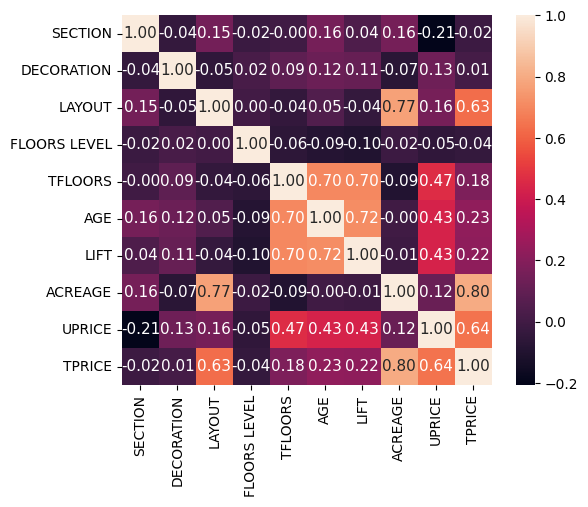

In [5]:
# 选择4个特征作为X
Relation = ['SECTION', 'DECORATION','LAYOUT','FLOORS LEVEL','TFLOORS', 'AGE','LIFT','ACREAGE','UPRICE','TPRICE']
features = ['AGE','LIFT','ACREAGE','UPRICE','LAYOUT']
featurData = df[features].values
labelData = df['TPRICE'].values

# 绘制关联矩阵
import numpy as np
import seaborn as sns
# 将相关系数矩阵以热力图的形式可视化
cm = np.corrcoef(df[Relation].values.T)
#  cbar=True 表示显示颜色条，square=True 表示将热力图的宽高设置为相等，annot_kws={'size':} 表示热力图上的数值字体大小
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':11}, yticklabels=Relation, xticklabels=Relation)
plt.show()

# 划分训练集和测试集
split_point = int(len(featurData) * 0.8)
P_train = featurData[:split_point]
P_test = featurData[split_point:]
T_train = labelData[:split_point]
T_test = labelData[split_point:]

# 获取特征数
n_features = P_train.shape[1]


In [6]:
#设置麻雀参数
pop = 10 #种群数量
MaxIter = 20 #最大迭代次数 --算法运行的最多代数
dim = 2 #维度 --优化随机森林回归模型的两个参数n_estimators和max_features
lb = np.array([1,1]) #下边界
ub = np.array([100,n_features])#上边界
fobj = fun
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('N_estimators最优解：',int(GbestPositon[0,0]))
print('Max_features最优解：',int(GbestPositon[0,1]))
#利用最终优化的结果计算分类正确率等信息
#利用最优参数训练随机森林
N_estimators = int(GbestPositon[0,0]) #随机森林个数
Max_features = int(GbestPositon[0,1]) #最大特征数

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
最优适应度值： [0.41810421]
N_estimators最优解： 81
Max_features最优解： 5


In [7]:
''' 利用SSA改进之后的随机森林进行预测'''
ModelSSA=RandomForestRegressor(n_estimators=N_estimators,max_features=Max_features, max_depth=None,min_samples_split=2, bootstrap=True,random_state=42)
ModelSSA.fit(P_train,T_train)
PredictTrainSSA=ModelSSA.predict(P_train)
PredictTestSSA=ModelSSA.predict(P_test)
# 计算MSE
MSETrainSSA = np.sqrt(np.sum((PredictTrainSSA - T_train)**2)) / T_train.size
MSETestSSA = np.sqrt(np.sum((PredictTestSSA - T_test)**2)) / T_test.size
print("RF-SSA训练集MSE：" +str(MSETrainSSA) )
print("RF-SSA测试集MSE："+str(MSETestSSA) )
print("RF-SSA总MSE："+str(MSETestSSA+MSETrainSSA) )

RF-SSA训练集MSE：0.024699367001755478
RF-SSA测试集MSE：0.39828515510270074
RF-SSA总MSE：0.4229845221044562


In [8]:
''' 利用基础随机森林进行预测'''
#设置参数为：n_estimators=10,max_features=1
#创建随机森林

Model=RandomForestRegressor(n_estimators=10,max_features=1, random_state=42)
Model.fit(P_train,T_train)
PredictTrain=Model.predict(P_train)
PredictTest=Model.predict(P_test)
MSETrain= np.sqrt(np.sum((PredictTrain - T_train)**2))/T_train.size#计算MSE
MSETest=np.sqrt(np.sum((PredictTest - T_test)**2))/T_test.size#计算MSE
print("RF训练集MSE：" +str(MSETrain) )
print("RF测试集MSE："+str(MSETest) )
print("RF总MSE："+str(MSETest+MSETrain) )

RF训练集MSE：0.0992297785958266
RF测试集MSE：0.6549165384992855
RF总MSE：0.7541463170951122


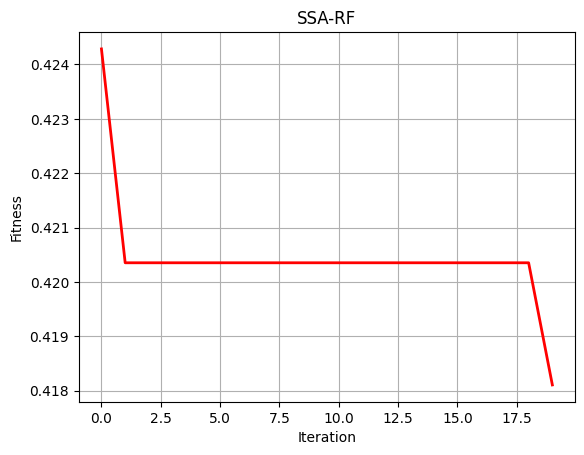

<Figure size 640x480 with 0 Axes>

In [9]:
#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SSA-RF',fontsize='large')
plt.show()
plt.savefig('../适应度曲线.png')

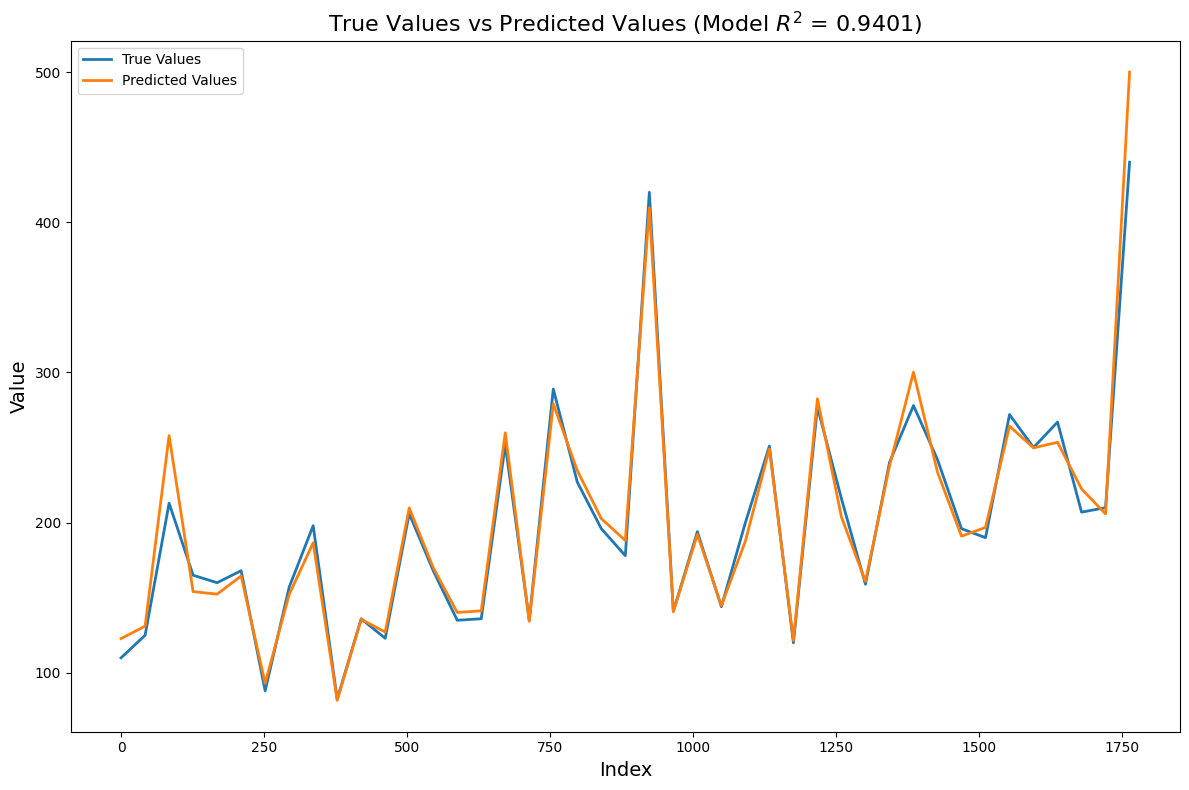

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 设置数据采样的间隔
sampling_interval = 42
# 对数据进行采样
sampled_indices = range(0, len(T_test), sampling_interval)
sampled_T_test = T_test[sampled_indices]
sampled_PredictTest = PredictTest[sampled_indices]
# 创建图形和子图
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(sampled_indices, sampled_T_test, label='True Values', linewidth=2)
ax.plot(sampled_indices, sampled_PredictTest, label='Predicted Values', linewidth=2)
ax.set_xlabel('Index', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title(f'True Values vs Predicted Values (Model $R^2$ = {r2_score(T_test, PredictTest):.4f})', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()

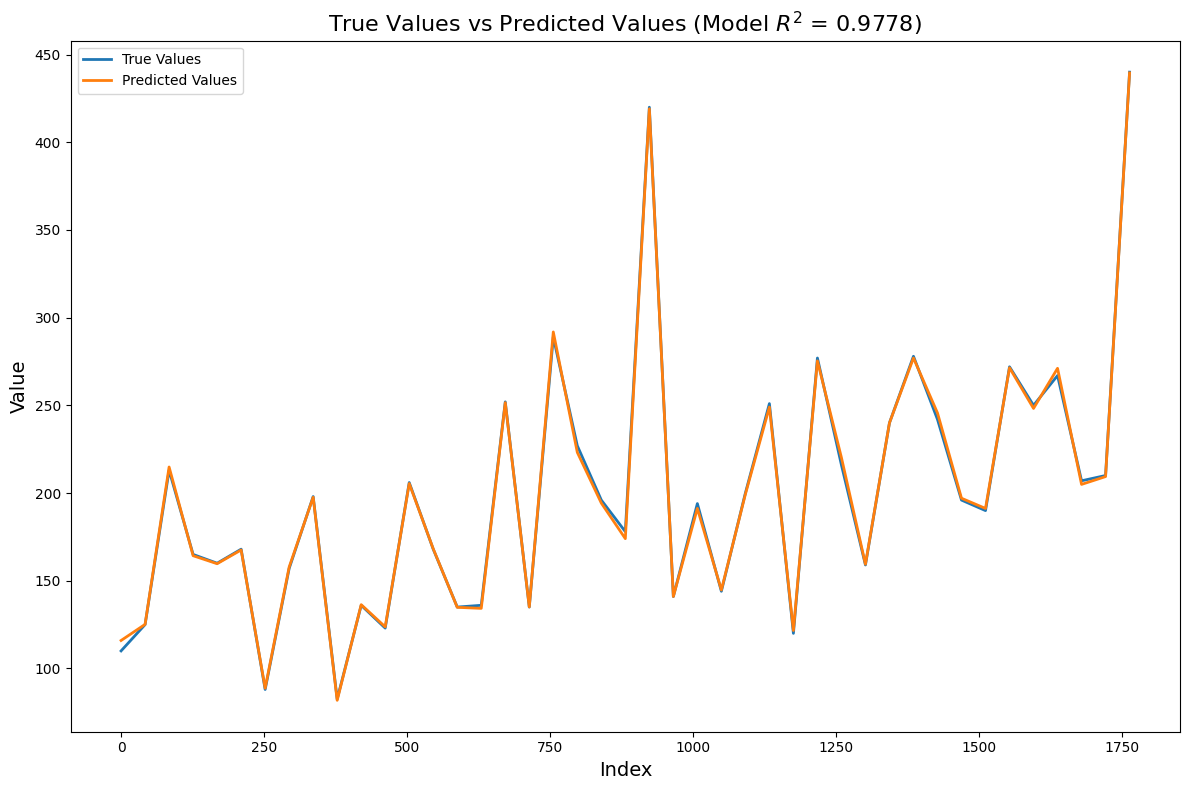

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 设置数据采样的间隔
sampling_interval = 42
# 对数据进行采样
sampled_indices = range(0, len(T_test), sampling_interval)
sampled_T_test = T_test[sampled_indices]
sampled_PredictTestSSA = PredictTestSSA[sampled_indices]
# 创建图形和子图
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(sampled_indices, sampled_T_test, label='True Values', linewidth=2)
ax.plot(sampled_indices, sampled_PredictTestSSA, label='Predicted Values', linewidth=2)
ax.set_xlabel('Index', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title(f'True Values vs Predicted Values (Model $R^2$ = {r2_score(T_test, PredictTestSSA):.4f})', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()


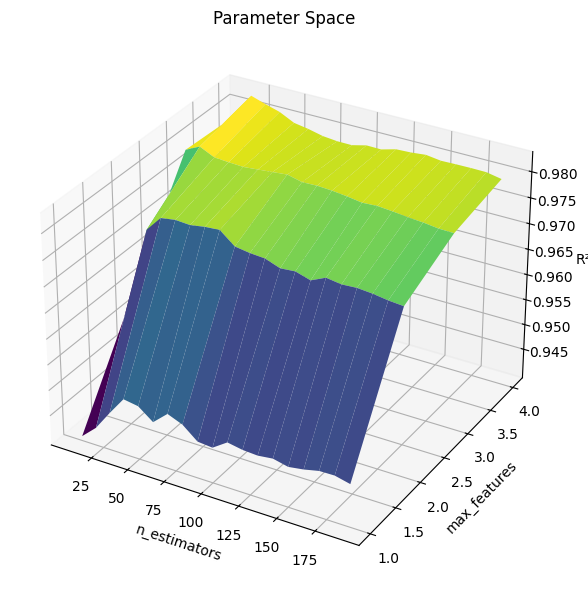

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

# 生成网格点
n_estimators_range = np.arange(10, 200, 10)
max_features_range = np.arange(1, P_train.shape[1], 1)
n_estimators_grid, max_features_grid = np.meshgrid(n_estimators_range, max_features_range)

# 计算不同参数组合下的R²
r2_scores = np.zeros_like(n_estimators_grid, dtype=float)
for i in range(n_estimators_grid.shape[0]):
    for j in range(n_estimators_grid.shape[1]):
        n_estimators = int(n_estimators_grid[i, j])
        max_features = int(max_features_grid[i, j])
        
        model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features,
                                      max_depth=None, min_samples_split=2, bootstrap=True, random_state=42)
        model.fit(P_train, T_train)
        
        predict_test = model.predict(P_test)
        
        r2 = r2_score(T_test, predict_test)
        r2_scores[i, j] = r2

# 创建一个新的图形和三维坐标轴
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面
ax.plot_surface(n_estimators_grid, max_features_grid, r2_scores, cmap='viridis', edgecolor='none')

# 设置坐标轴标签和标题
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_features')
ax.set_zlabel('R²')
ax.set_title('Parameter Space')

# 显示图形
plt.tight_layout()
plt.show()